#Problema 13 de la guía 9
##S. Schiavinato LU:153/1
###Tests de bondad de ajuste, no paramétricos, entre datos y una distribución normal dada

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
import scipy.misc as misc
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20

:0: FutureWarning: IPython widgets are experimental and may change in the future.


En la función a continuación se implementa la lógica del test, donde vamos a efectuar un test χ-cuadrado, de Kolmogorov y de Cramer/Von Mises para rechazar (o no) que los datos provengan de la distribución normal dada N(0,2.5). Se grafica el histograma, normalizado de los datos, con bines  entre -7 y 7, con 0.25 de ancho (esto debe verificar que la frecuencia de cada bin sea mayor a 5, como exige el test). A este grafico se le superpone la distribución de la normal. Finalmente para el test de Kolmogorov y Cramer-Von Mises se grafica la acumulativa empírica de los datos (S(x)) y la acumulativa de la normal, para observar gráficamente el test

In [6]:
def G9E13(N = 3000):
    gauss = stats.norm(0, 2.5)
    data = np.loadtxt("datos-G9E13.dat") 
    bins = np.arange(-7,7,0.25)
    data = data[:N]

    N = data.shape[0]
    #plt.axhline(y = 10, c="k",ls="--")
    hist, bins = np.histogram(data, bins = bins);
    yerr = np.sqrt(hist)/(hist.sum()*np.diff(bins))
    histNorm = hist/(hist.sum()*np.diff(bins))
    plt.bar(bins[:-1], histNorm, ecolor = "g", yerr = yerr, width = np.diff(bins))
    plt.plot(bins[:-1], gauss.pdf(bins[:-1]), 'r-')
    χ2 = 0
    for i in range(bins[:-1].shape[0]):
        ni = hist[i]
        fi = N * (stats.norm(0,2.5).cdf(bins[i + 1]) - stats.norm(0,2.5).cdf(bins[i]))
        χ2 += (ni - fi)**2/ni
    
    
    p = 1 - stats.chi2(bins[:-1].shape[0]).cdf(χ2)
    print("χ2 = {}, p = {}".format(χ2, p))

    ##Test de Kolmogorov-Smirnov
    data.sort() #Ordeno primero
    S = [[data[0], 0]] #Primer punto para la S(Xi)
    for i in range(1, N):
        if data[i] == data[i-1]:
            S[-1][1] += 1/N  #Si se repite, sumo 1/N más
        else: 
            S.append([data[i], 1/N + S[-1][1]]) #Por cada dato, subo un 1/N
    S = np.array(S)

    #Grafico la CDF empirica y la de la gaussiana
    plt.figure(2)
    plt.plot(S[:,0], S[:,1], 'b-', label = "Acumulada de datos")
    plt.plot(S[:,0], gauss.cdf(S[:,0]), 'r-', label = "Acumulada de gaussiana N(0, 2.5)");
    plt.legend(loc = 0)
    #print((ecdf-gauss.cdf(bins[:-1])).max())

    #Ahora calculamos 
    D = np.abs(S[:,1] - gauss.cdf(S[:,0])).max()
    pKS = 1 - stats.ksone(N).cdf(D) #Acá usa la distribución de Kolmogorov
    print("Dn = {}, p = {}".format(D, pKS))

    #Ahora para calcular Cramer Von Misses
    #integro numéricamente con x ϵ {Xi}
    Cn = np.trapz((S[:,1] - gauss.cdf(S[:,0]))**2 * gauss.pdf(S[:,0]), S[:,0])
    print("Cn = {}, p = {}".format(Cn, 0.1))

Habiendo definido el código a ejecutar, se pasa a observar como resuelven los tests para 3000 muestras de la población

χ2 = 66.26647034176688, p = 0.142050775060386
Dn = 0.0316087390617642, p = 0.002437846836559898
Cn = 0.00017588237463572927, p = 0.1


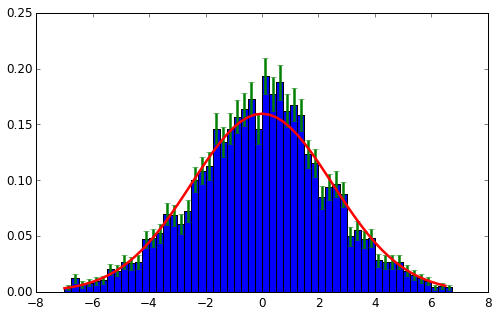

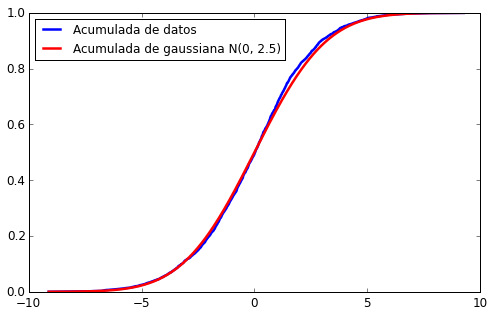

In [8]:
G9E13(N=3000)

Se encuentra que el test de χ-cuadrado no es capaz de de rechazar la hipótesis nula, pero el test de Kolmogorov y de Cramer/Von Mises si, exiguiendo una significacia ɑ=0.05. Ahora para 4000, 5000 y 6000 muestras

χ2 = 81.84099320372823, p = 0.01091550278063036
Dn = 0.03144670961601792, p = 0.0003585528331370158
Cn = 0.0002106158210908483, p = 0.1


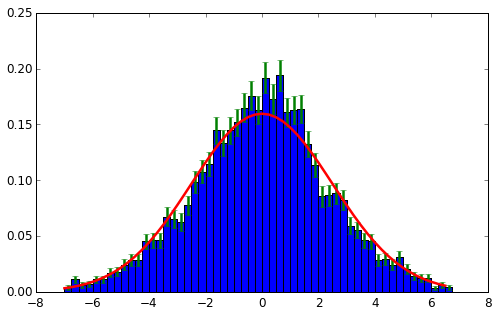

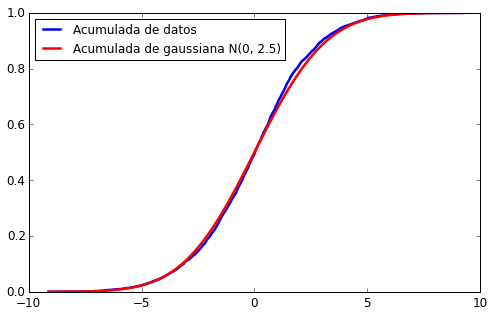

In [11]:
G9E13(N=4000)

χ2 = 94.31674453820938, p = 0.000768651074386173
Dn = 0.028761779378805197, p = 0.0002503295664132432
Cn = 0.00021466978187883296, p = 0.1


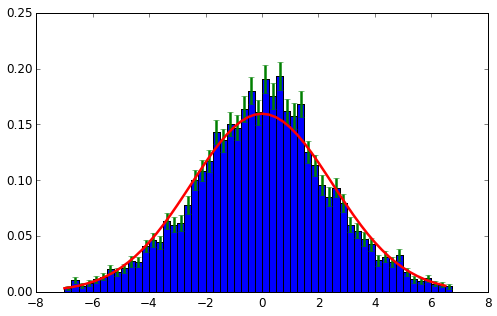

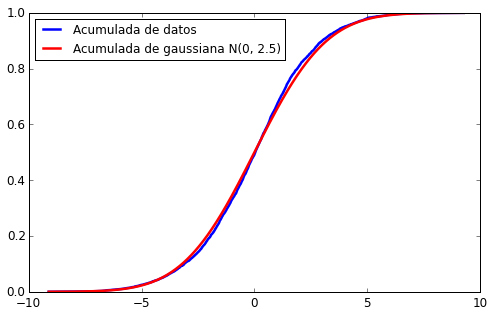

In [12]:
G9E13(N=5000)

χ2 = 114.22165258965553, p = 4.9063444049757265e-06
Dn = 0.02809511271213927, p = 7.544776875512138e-05
Cn = 0.0002254688645857482, p = 0.1


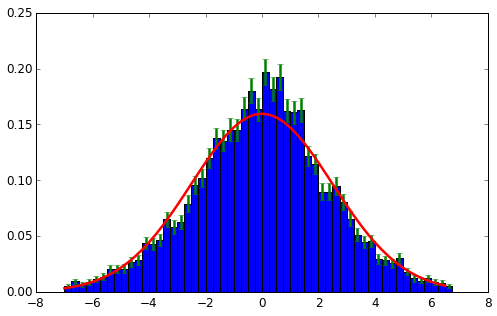

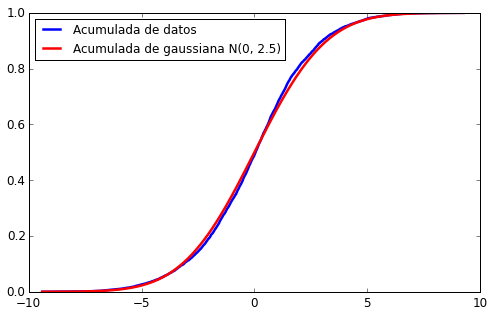

In [13]:
G9E13(N=6000)

Ya con 4000 datos el test de χ-cuadrado es capaz de rechazar la hipótesis nula. Para completar, se grafica la totalidad de los datos, sobrepuesto a la distribución normal propuesta, más una gaussiana con menor varianza y otra con mayor varianza, para observar visualmente la normalidad de los datos

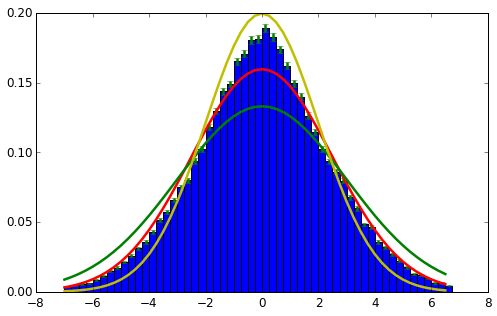

In [25]:
gauss = stats.norm(0, 2.5)
data = np.loadtxt("datos-G9E13.dat") 
bins = np.arange(-7,7,0.25)
#plt.axhline(y = 10, c="k",ls="--")
hist, bins = np.histogram(data, bins = bins);
yerr = np.sqrt(hist)/(hist.sum()*np.diff(bins))
histNorm = hist/(hist.sum()*np.diff(bins))
plt.bar(bins[:-1], histNorm, ecolor = "g", yerr = yerr, width = np.diff(bins));
plt.plot(bins[:-1], stats.norm(0,2.5).pdf(bins[:-1]), 'r-')
plt.plot(bins[:-1], stats.norm(0,3).pdf(bins[:-1]), 'g-')
plt.plot(bins[:-1], stats.norm(0,2).pdf(bins[:-1]), 'y-');

Este gráfico permite visualmente encontrar, sin mucho rigor, que los datos no provienen de una distribución normal, ya que al ajustar de forma acertada el centro de probabilidad de los datos no ajusta a las colas, y lo contrario. Se podría efectuar un test específico para probar la normalidad